✅ Data loaded successfully!

Shape: (240, 6)


,Commodity,Country,ExportType,District,Year,Value_USD
0,2504 Natural Graphite,Canada,Total Exports,All Districts,2015,3621211
1,2504 Natural Graphite,Canada,Total Exports,All Districts,2016,4194911
2,2504 Natural Graphite,Canada,Total Exports,All Districts,2017,4728338
3,2504 Natural Graphite,Canada,Total Exports,All Districts,2018,3306594
4,2504 Natural Graphite,Canada,Total Exports,All Districts,2019,1480134


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Commodity   240 non-null    object
 1   Country     240 non-null    object
 2   ExportType  240 non-null    object
 3   District    240 non-null    object
 4   Year        240 non-null    int64 
 5   Value_USD   240 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 11.4+ KB


None


Missing values per column:


Commodity     0
Country       0
ExportType    0
District      0
Year          0
Value_USD     0
dtype: int64


Duplicate rows: 0


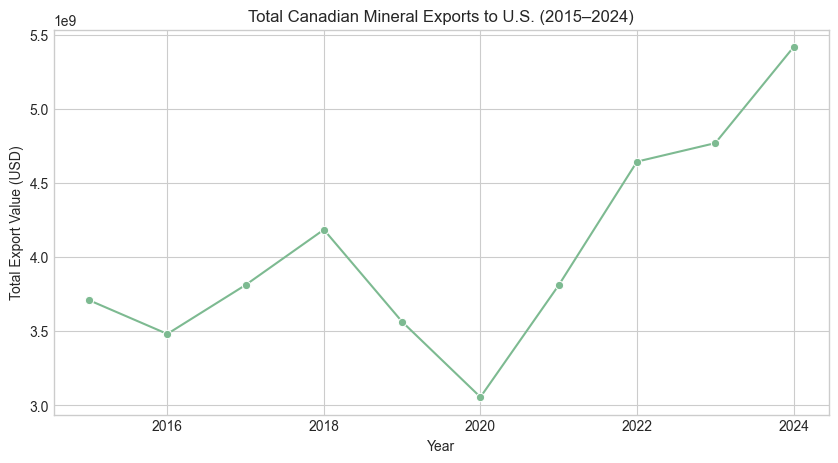

/var/folders/np/5s09jdp52p3d05hdsv6hj5l80000gn/T/ipykernel_6484/1464619046.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_commodities, x='Value_USD', y='Commodity', palette='viridis')


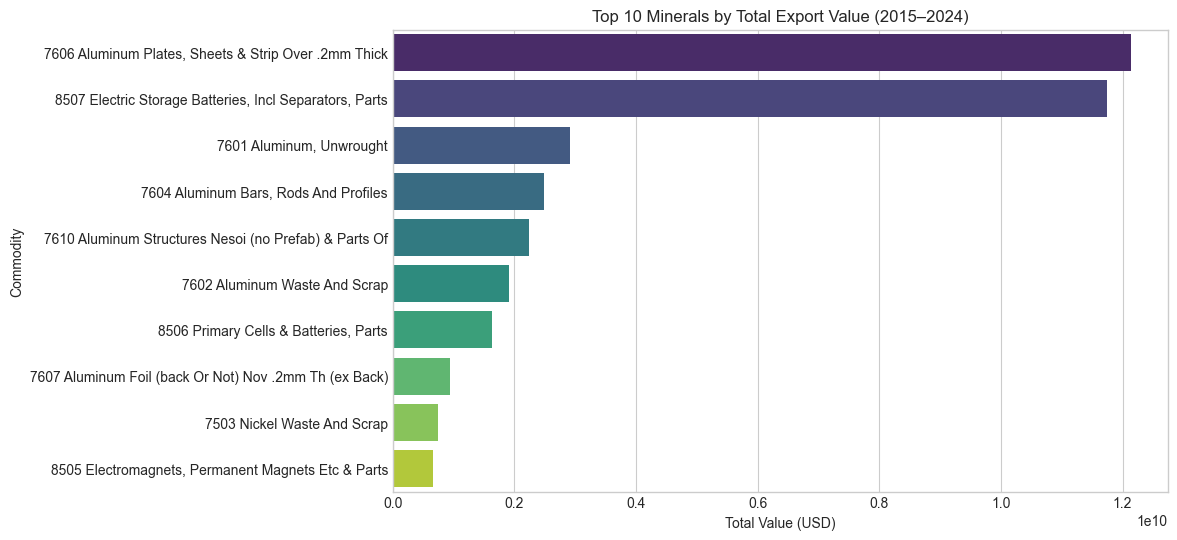

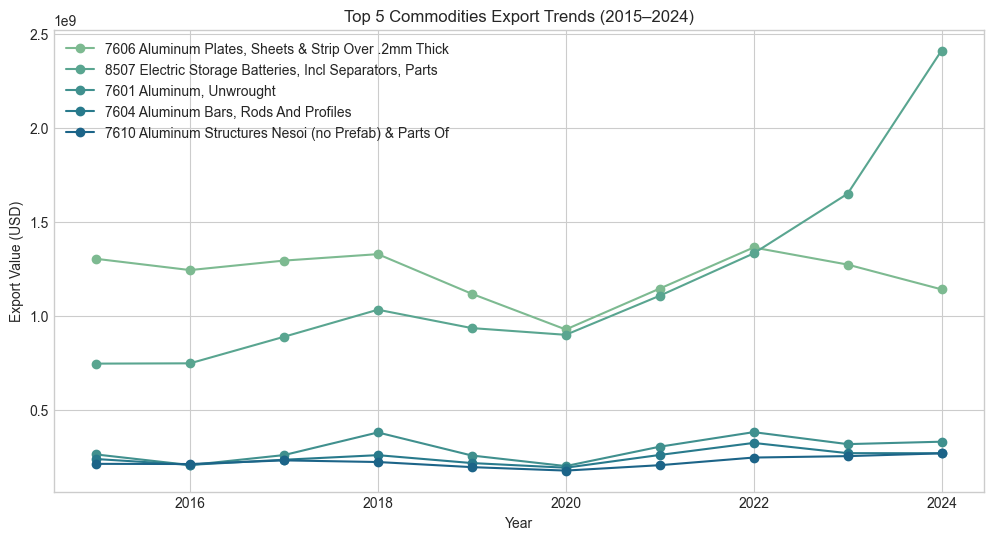

,mean,std,cv
Commodity,,,
2822 Cobalt Oxide & Hydroxide; Commercial Cobalt Oxides,9.863711e+05,1.034600e+06,1.05
"7501 Nickle Mattes, Nickle Oxide Sinters, Oth Int Prod",7.856970e+06,5.953041e+06,0.76
"8507 Electric Storage Batteries, Incl Separators, Parts",1.174908e+09,5.140713e+08,0.44
"7507 Nickle Tubes, Pipes And Tube Or Pipe Fittings",2.528697e+07,9.389994e+06,0.37
7503 Nickel Waste And Scrap,7.420133e+07,2.701565e+07,0.36
2504 Natural Graphite,3.043617e+06,1.051579e+06,0.35
"7505 Nickel Bars, Rods, Profiles And Wire",4.367267e+07,1.430841e+07,0.33
"8105 Cobalt Mattes Etc, Cobalt & Art, Inc Waste & Scrap",2.927280e+07,8.965301e+06,0.31
7603 Aluminum Powders And Flakes,4.651018e+06,1.273529e+06,0.27


/var/folders/np/5s09jdp52p3d05hdsv6hj5l80000gn/T/ipykernel_6484/1464619046.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=volatility['cv'], y=volatility.index, palette='mako')


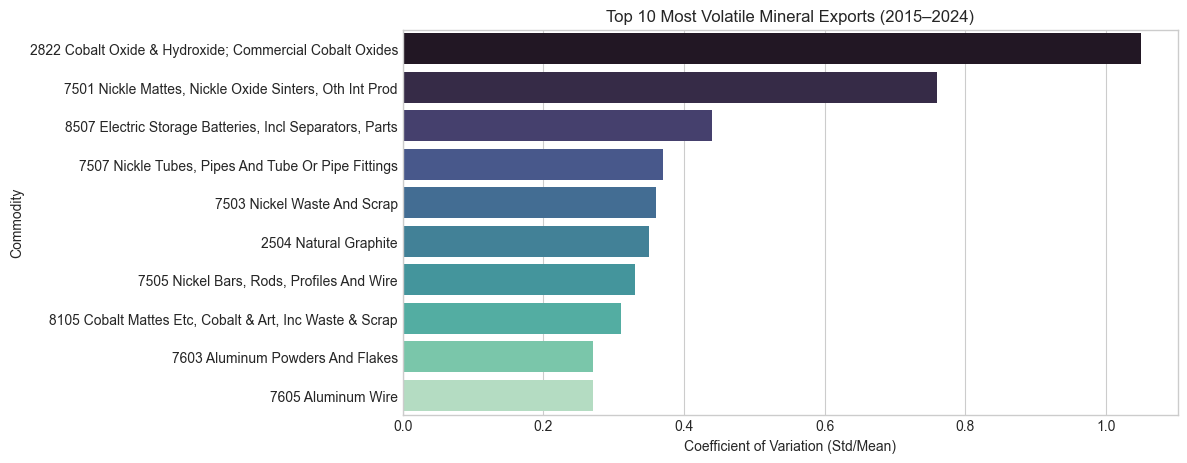

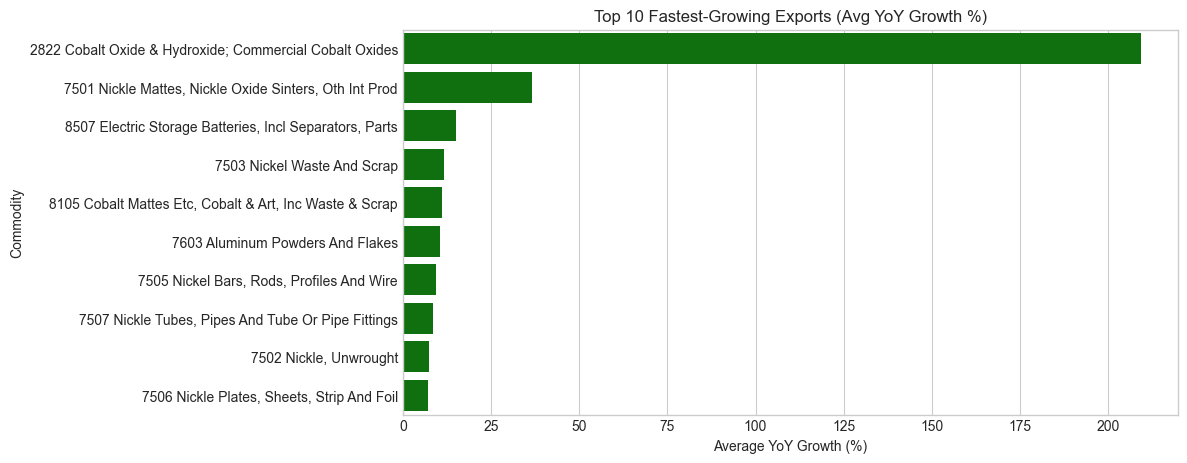

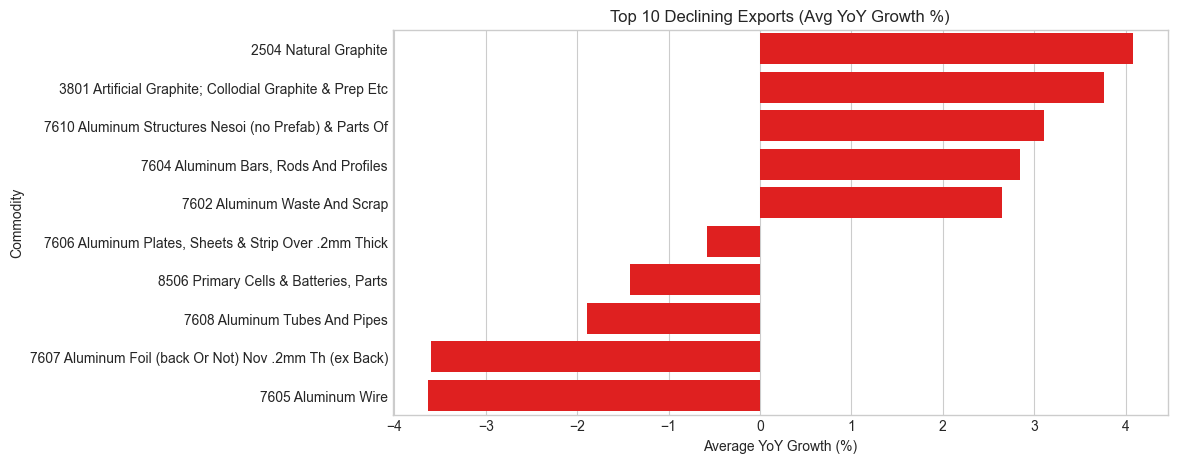


Herfindahl-Hirschman Index (HHI): 1921.55
→ Moderately concentrated — some reliance risk.


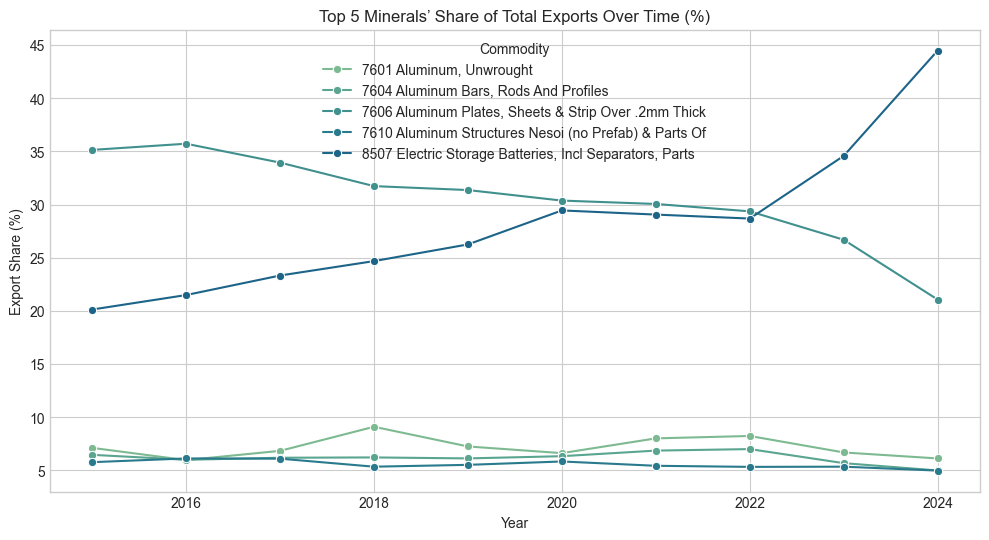

In [1]:

# --- 1. Setup ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("crest")

# Load data
df = pd.read_csv('../data/critminerals10yr.csv')

# Rename columns for easier handling
df.columns = ['Commodity', 'Country', 'ExportType', 'District', 'Year', 'Value_USD']

# Basic Overview 
print("✅ Data loaded successfully!\n")
print(f"Shape: {df.shape}")
display(df.head())
display(df.info())

# Data Cleaning
df['Year'] = df['Year'].astype(int)
df['Value_USD'] = pd.to_numeric(df['Value_USD'], errors='coerce')
df.dropna(subset=['Value_USD'], inplace=True)

# Check Missing Values & Duplicates 
print("\nMissing values per column:")
display(df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())


# UNIVARIATE ANALYSIS


# Total Export Value per Year 
yearly = df.groupby('Year')['Value_USD'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=yearly, x='Year', y='Value_USD', marker='o')
plt.title("Total Canadian Mineral Exports to U.S. (2015–2024)")
plt.ylabel("Total Export Value (USD)")
plt.show()


# This shows overall trade volume trends. Declines may indicate potential supply risk or market shifts.

#  Top 10 Commodities by Total Export Value 
top_commodities = df.groupby('Commodity')['Value_USD'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=top_commodities, x='Value_USD', y='Commodity', palette='viridis')
plt.title("Top 10 Minerals by Total Export Value (2015–2024)")
plt.xlabel("Total Value (USD)")
plt.ylabel("Commodity")
plt.show()


# Identifies which minerals dominate U.S. imports — concentration risk appears if one or two minerals dominate.

# BIVARIATE ANALYSIS

# Commodity Export Trends Over Time 
top_names = top_commodities['Commodity'].head(5)
plt.figure(figsize=(12,6))
for name in top_names:
    subset = df[df['Commodity'] == name]
    plt.plot(subset['Year'], subset['Value_USD'], marker='o', label=name)
plt.title("Top 5 Commodities Export Trends (2015–2024)")
plt.xlabel("Year")
plt.ylabel("Export Value (USD)")
plt.legend()
plt.show()

# Insight:
# Observe if key minerals show high volatility or decline — both signal potential supply chain instability.

# Commodity Volatility (Coefficient of Variation) 
volatility = df.groupby('Commodity')['Value_USD'].agg(['mean', 'std'])
volatility['cv'] = (volatility['std'] / volatility['mean']).round(2)
volatility = volatility.sort_values(by='cv', ascending=False).head(10)
display(volatility)

plt.figure(figsize=(10,5))
sns.barplot(x=volatility['cv'], y=volatility.index, palette='mako')
plt.title("Top 10 Most Volatile Mineral Exports (2015–2024)")
plt.xlabel("Coefficient of Variation (Std/Mean)")
plt.ylabel("Commodity")
plt.show()

# Insight:
# High CV (>1) indicates unstable export trends → potential risk for U.S. supply security.

#  Year-over-Year Growth by Commodity 
df['YoY_Growth'] = df.groupby('Commodity')['Value_USD'].pct_change() * 100
growth_summary = df.groupby('Commodity')['YoY_Growth'].mean().dropna().sort_values(ascending=False)
top_growth = growth_summary.head(10)
bottom_growth = growth_summary.tail(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_growth.values, y=top_growth.index, color='green')
plt.title("Top 10 Fastest-Growing Exports (Avg YoY Growth %)")
plt.xlabel("Average YoY Growth (%)")
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x=bottom_growth.values, y=bottom_growth.index, color='red')
plt.title("Top 10 Declining Exports (Avg YoY Growth %)")
plt.xlabel("Average YoY Growth (%)")
plt.show()

# Insight:
# Minerals with negative growth indicate weakening trade — potential vulnerability if they are critical materials.


#  CONCENTRATION ANALYSIS


# Market Concentration (Herfindahl Index) 
total_value = df['Value_USD'].sum()
share = df.groupby('Commodity')['Value_USD'].sum() / total_value
HHI = (share ** 2).sum() * 10000  # scaled 0–10000

print(f"\nHerfindahl-Hirschman Index (HHI): {HHI:.2f}")
if HHI < 1500:
    print("→ Competitive market, diversified mineral supply.")
elif HHI < 2500:
    print("→ Moderately concentrated — some reliance risk.")
else:
    print("→ Highly concentrated — potential supply chain vulnerability.")

#  Top Commodity Share Over Time 
yearly_totals = (
    df.groupby(['Year', 'Commodity'], as_index=False)['Value_USD']
      .sum()
      .sort_values(['Year','Commodity'])
)

# Use transform so the result aligns 1:1 with yearly_totals' rows
yearly_totals['Share'] = (
    100 * yearly_totals['Value_USD'] /
    yearly_totals.groupby('Year')['Value_USD'].transform('sum')
)

yearly_shares = yearly_totals[['Year', 'Commodity', 'Share']]

top_yearly = yearly_shares[yearly_shares['Commodity'].isin(top_names)]

plt.figure(figsize=(12,6))
sns.lineplot(data=top_yearly, x='Year', y='Share', hue='Commodity', marker='o')
plt.title("Top 5 Minerals’ Share of Total Exports Over Time (%)")
plt.ylabel("Export Share (%)")
plt.show()



# Insight:
# - If one mineral’s share rises sharply, dependency risk increases.


# SUMMARY INSIGHTS


# Minerals with highest volatility → supply chain instability risk  
# Minerals with declining YoY growth → potential weakening supply  
# Rising concentration ratio or HHI → increased dependency  
# Sharp value dips post-2020 → pandemic or policy sensitivity  


